# Project Based Learning



#Topik
Dataset Gym Members Exercise menggunakan KNN Regresi

# Anggota Kelompok
1. Muhammad Bagas Wahyudi - 1301220296
2. Haidar Sayyid Ramadhan - 1301223105

# Pendahuluan dan Paparan Data




##Penjelasan masalah yang ingin diselesaikan

<p>Kami ingin memprediksi jumlah kalori yang dibakar pada proyek ini dengan menggunakan atribut seperti <i>age</i>, <i>weight</i>, <i>high</i>, <i>Session_Duration</i> (hours), dan <i>Workout_Type</i> yang dilakukan. Masalah ini termasuk dalam kategori regresi di mana variabel kontinu "Calories_Burned" adalah targetnya.
</p>

## Paparan, statistik dan sumber dari dataset yang digunakan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Load dataset
file_path = '/content/gym_members_exercise_tracking.csv'
data = pd.read_csv(file_path, sep=';')

In [ ]:
print("5 Data teratas:")
data.head()

5 Data teratas:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
# EDA: Check data structure and distribution
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
# Periksa missing value
missing_values = data.isnull().sum()

# Tampilkan hasil
print("Jumlah missing value di setiap kolom:")
print(missing_values)

Jumlah missing value di setiap kolom:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


## Paparan pre-processing dataset


In [ ]:
# Encoding categorical feature
workout_type_mapping = {value: idx for idx, value in enumerate(data['Workout_Type'].unique())}
data['Workout_Type'] = data['Workout_Type'].map(workout_type_mapping)

# Select features and target
features = ['Age', 'Weight (kg)', 'Height (m)', 'Session_Duration (hours)', 'Workout_Type']
target = 'Calories_Burned'

X = data[features].values
y = data[target].values

#Normalization
# Min-Max Scaling
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

print("Hasil data fiture Workout_Type setelah diencoding")
# print(data.head())
# print("\n")
print(data['Workout_Type'])


Hasil data fiture Workout_Type setelah diencoding
0      0
1      1
2      2
3      3
4      3
      ..
968    3
969    3
970    2
971    1
972    3
Name: Workout_Type, Length: 973, dtype: int64


## Mekanisme pembagian training dan testing


In [ ]:
# Split data untuk data latih dan data uji
def train_test_split_manual(X, y, test_size=0.2):
    n_test = int(len(X) * test_size)
    indices = np.arange(len(X))
    np.random.seed(42)  # For reproducibility
    np.random.shuffle(indices)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X_scaled, y)


# Metode dan Eksperimen






## Penjelasan mengenai metode yang digunakan
<p>Metode yang digunakan adalah <b>K-Nearest Neighbors (KNN) Regression</b>. Algoritma ini memprediksi nilai target dengan menghitung rata-rata nilai target dari k tetangga terdekat berdasarkan jarak Euclidean.</p>


## Pengukuran kinerja yang digunakan (matrik evaluasi)

Pengukuran kinerja yang digunakan terdiri dari: Mean Absolute Error (MAE), Mean Squared Error (MSE), dan R^2 karena menggunakan metode KNN Regresi.

In [ ]:
# Implementasi KNN untuk regresi
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        # Menggunakan rumus euclidean distance
        distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
        nearest_indices = distances.argsort()[:k]
        nearest_values = y_train[nearest_indices]
        y_pred.append(nearest_values.mean())
    return np.array(y_pred)

# Matriks Evaluasi
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)


## Setting parameter yang digunakan, minimal 2 setting

In [ ]:
# Train and evaluate the model with k = 3
k = 3
y_pred_k3 = knn_predict(X_train, y_train, X_test, k)
mae_k3 = mean_absolute_error(y_test, y_pred_k3)
mse_k3 = mean_squared_error(y_test, y_pred_k3)
r2_k3 = r2_score(y_test, y_pred_k3)
print(f"Mean Absolute Error dengan k = 3: {mae_k3:.2f}")
print(f"Mean Squared Error dengan k = 3: {mse_k3:.2f}")
print(f"R² Score dengan k = 3: {r2_k3:.2f}\n")

# Train and evaluate the model with k = 5
k = 5
y_pred_k5 = knn_predict(X_train, y_train, X_test, k)
mae_k5 = mean_absolute_error(y_test, y_pred_k5)
mse_k5 = mean_squared_error(y_test, y_pred_k5)
r2_k5 = r2_score(y_test, y_pred_k5)
print(f"Mean Absolute Error dengan k = 5: {mae_k5:.2f}")
print(f"Mean Squared Error dengan k = 5: {mse_k5:.2f}")
print(f"R² Score dengan k = 5: {r2_k5:.2f}")

Mean Absolute Error dengan k = 3: 106.65
Mean Squared Error dengan k = 3: 18464.66
R² Score dengan k = 3: 0.78

Mean Absolute Error dengan k = 5: 104.02
Mean Squared Error dengan k = 5: 17725.71
R² Score dengan k = 5: 0.78


# Hasil dan Analisis


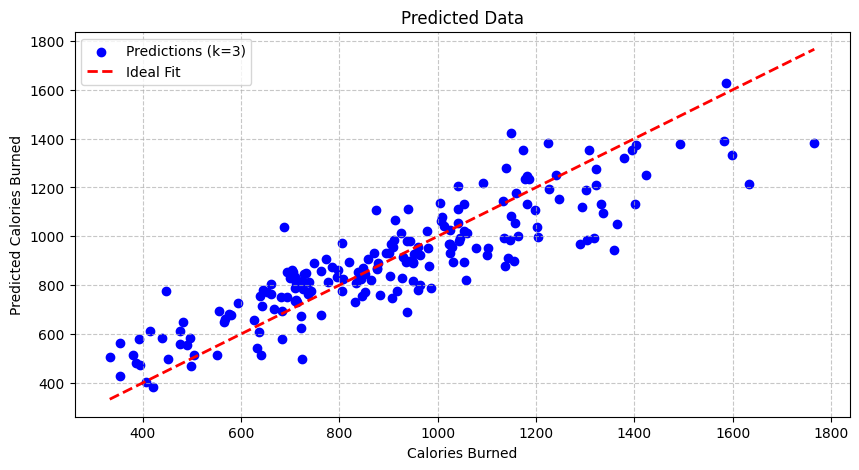

In [ ]:
# Visualisasi hasil prediksi dengan k = 3
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_k3, color='blue', label='Predictions (k=3)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Predicted Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

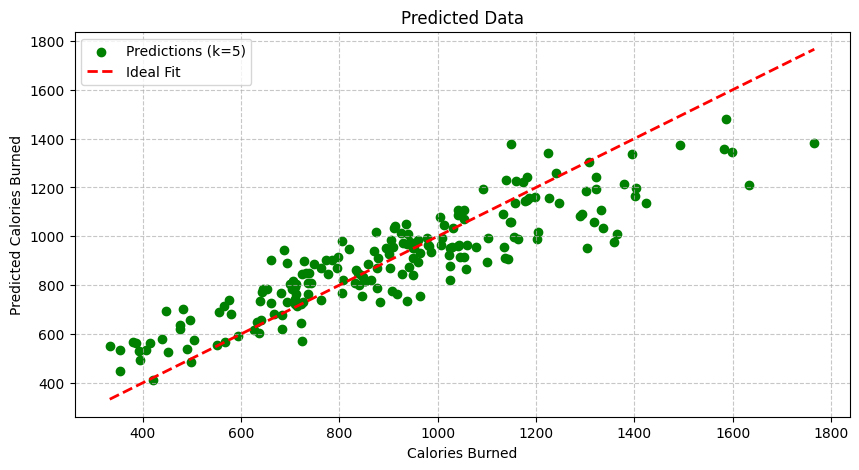

In [ ]:
# Visualisasi hasil prediksi dengan k = 5
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_k5, color='green', label='Predictions (k=5)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Predicted Data')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Kinerja dan Analisis Tahap Training
Pada tahap training, model K-Nearest Neighbors (KNN) dilatih menggunakan data training (X_train dan y_train). Model ini menggunakan parameter k yang menentukan jumlah tetangga terdekat yang digunakan untuk prediksi. Pada percobaan ini, nilai k yang digunakan adalah 3 dan 5.

## Kinerja dan Analisis Tahap Testing
Pada tahap testing, model KNN diuji menggunakan data testing (X_test dan y_test). Hasil prediksi dibandingkan dengan nilai aktual untuk menghitung metrik evaluasi seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), dan R² Score.

## Hasil Evaluasi
- Mean Absolute Error dengan k = 3: 106.65

- Mean Squared Error dengan k = 3: 18464.66

- R² Score dengan k = 3: 0.78

- Mean Absolute Error dengan k = 5: 104.02

- Mean Squared Error dengan k = 5: 17725.71

- R² Score dengan k = 5: 0.78



# Kesimpulan
Dari percobaan yang telah dilakukan, dapat disimpulkan bahwa model KNN dengan k = 5 memberikan kinerja terbaik dengan nilai Mean Absolute Error (MAE) sebesar 104.02 dan Mean Squared Error (MSE) sebesar 17725.71. Kedua nilai R² Score untuk k = 3 dan k = 5 adalah 0.78, menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam memprediksi jumlah kalori yang terbakar berdasarkan data yang diberikan. Visualisasi scatter plot menunjukkan bahwa sebagian besar prediksi mendekati garis ideal fit, meskipun terdapat beberapa outlier.
